# **1.1 Data exploration with PCA**
1. Import and view the data. How many columns do you have? Which columns will you
use in your PCA?

In [ ]:
import pandas as pd 
import numpy as np
from sklearn.decomposition import PCA

In [ ]:
df1 = pd.read_csv('Pottery.csv')
df1

,Unnamed: 0,Site,Al,Fe,Mg,Ca,Na
0,1,Llanedyrn,14.4,7.00,4.30,0.15,0.51
1,2,Llanedyrn,13.8,7.08,3.43,0.12,0.17
2,3,Llanedyrn,14.6,7.09,3.88,0.13,0.20
3,4,Llanedyrn,11.5,6.37,5.64,0.16,0.14
4,5,Llanedyrn,13.8,7.06,5.34,0.20,0.20
5,6,Llanedyrn,10.9,6.26,3.47,0.17,0.22
6,7,Llanedyrn,10.1,4.26,4.26,0.20,0.18
7,8,Llanedyrn,11.6,5.78,5.91,0.18,0.16
8,9,Llanedyrn,11.1,5.49,4.52,0.29,0.30
9,10,Llanedyrn,13.4,6.92,7.23,0.28,0.20


In [ ]:
len(df1.columns)

7

We have 7 columns in this dataset, and I think we should use last 5 column in PCA(Al	Fe	Mg	Ca	Na)

2. Pre-process the data and perform PCA with 3 PCs.

In [ ]:
ind = df1['Site']
df1_2 = pd.DataFrame(df1.values, index = ind, columns = df1.columns)
df1_2 = df1_2.drop(["Unnamed: 0", "Site"], axis = 1)
df1_2

,Al,Fe,Mg,Ca,Na
Site,,,,,
Llanedyrn,14.4,7.0,4.3,0.15,0.51
Llanedyrn,13.8,7.08,3.43,0.12,0.17
Llanedyrn,14.6,7.09,3.88,0.13,0.2
Llanedyrn,11.5,6.37,5.64,0.16,0.14
Llanedyrn,13.8,7.06,5.34,0.2,0.2
Llanedyrn,10.9,6.26,3.47,0.17,0.22
Llanedyrn,10.1,4.26,4.26,0.2,0.18
Llanedyrn,11.6,5.78,5.91,0.18,0.16
Llanedyrn,11.1,5.49,4.52,0.29,0.3


In [ ]:
df1_2.fillna(df1_2.mean(), inplace = True)

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()
df1_2scaled = scaler.fit_transform(df1_2)

In [ ]:
pca = PCA(n_components=3, svd_solver='full')
pca_scores = pca.fit_transform(df1_2scaled)
scores = pd.DataFrame(data = pca_scores, columns = ['PC1', 'PC2', 'PC3'], index = df1_2.index)
loadings = pd.DataFrame(data = pca.components_.T, columns = ['PC1', 'PC2', 'PC3'], index = df1_2.columns)

In [ ]:
import matplotlib.pyplot as plt

3. Plot the cumulative explained variance graph. What percent of the variance do the
first 2 and 3 components describe?

percent of the variance do the first 2 and 3 components is 89.73 and 94.62 percentage.

In [ ]:
pca5 = PCA(n_components=5, svd_solver='full')
pca5.fit(df1_2scaled)

PCA(n_components=5, svd_solver='full')

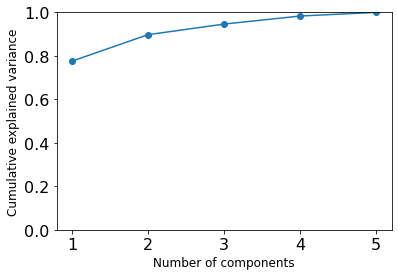

In [ ]:
plt.plot(range(1,pca5.n_components+1), np.cumsum(pca5.explained_variance_ratio_),'-o')
plt.xlabel('Number of components', fontsize=12)
plt.ylabel('Cumulative explained variance', fontsize=12)
plt.tick_params(labelsize=16)
plt.ylim(0,1)
plt.show()

In [ ]:
pca.explained_variance_ratio_*100

array([77.55593977, 12.17619687,  4.88384364])

In [ ]:
sum(pca5.explained_variance_ratio_[:2])*100

89.73213663789889

In [ ]:
sum(pca5.explained_variance_ratio_[:3])*100

94.61598027980749

4. Plot the scores-loadings graph for PC1-PC2. Visualize the different sites with a different colour or symbol.

In [ ]:
from sklearn.preprocessing import MaxAbsScaler

In [ ]:
def myplot(scores,loadings,loading_labels=None,score_labels=None):
    # adjusting the scores to fit in (-1,1)
    xt = scores[:,0]
    yt = scores[:,1]
    n = loadings.shape[0]
    scalext = 1.0/(xt.max() - xt.min())
    scaleyt = 1.0/(yt.max() - yt.min())
    xt_scaled = xt * scalext
    yt_scaled = yt * scaleyt
    # adjusting the loadings to fit in (-1,1)
    p = loadings
    p_scaled = MaxAbsScaler().fit_transform(p)
    
    #plt.scatter(xs * scalex,ys * scaley, s=10)
    for (x,y), label in zip(np.vstack((xt_scaled, yt_scaled)).T,score_labels):
        if 'AshleyRails' in label:
            plt.text(x, y, 'AR', ha='center', size=12, color = 'g')
        elif 'Caldicot' in label:
            plt.text(x, y, 'Cal', ha='center', size=12, color = 'y')
        elif 'IsleThorns' in label:
            plt.text(x, y, 'IT', ha='center', size=12, color = 'b')
        else:
            plt.text(x, y, 'Li', ha='center', size=12, color = 'purple')
    
    for i in range(n):
        plt.arrow(0, 0, p_scaled[i,0], p_scaled[i,1], color = 'r',alpha = 0.5)
        if loading_labels is None:
            plt.text(p_scaled[i,0], p_scaled[i,1], "Var"+str(i+1), color = 'g', ha = 'center', va = 'center')
        else:
            plt.text(p_scaled[i,0], p_scaled[i,1], loading_labels[i], color = 'r', ha = 'center', va = 'center', size=16)
    plt.xlim(-1,1)
    plt.ylim(-1,1)
    plt.xlabel("PC{}".format(1), fontsize=20);
    plt.ylabel("PC{}".format(2), fontsize=20);
    plt.tick_params(labelsize=16)
    plt.grid()

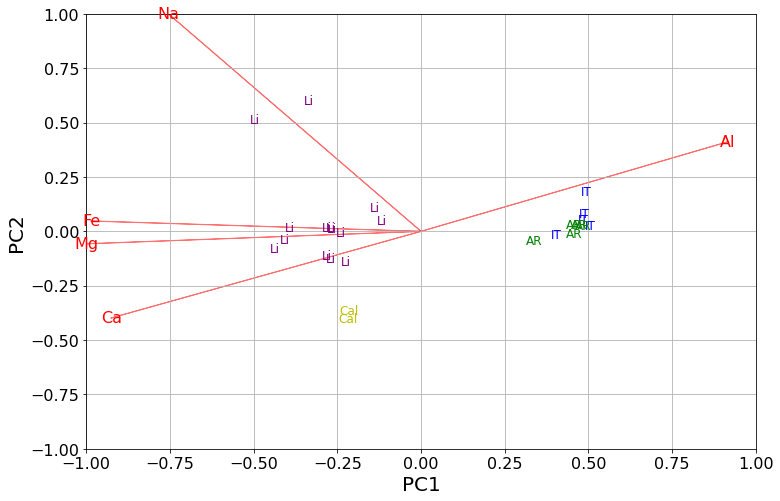

In [ ]:
plt.rcParams["figure.figsize"] = [12,8]
myplot(pca_scores[:,:2],loadings.iloc[:,:2],loading_labels=loadings.index,score_labels=scores.index)
plt.show()

5. How does the map of scores-loadings explains the reason that your company uses the raw material from Isle Thorns and Ashley Rails to manufacture Product B?

From the graph, point of IT and AR are in a cluster which means they have similar component.

6. Is the raw material from Caldicot a good replacement for Llanedyrn? Yes or no and why?

No, since from the graph we can see that the product of Lianedyrn are in area of Fe and Mg, also some of Lianedyrn have Na. But for Caldicot data point are concentrate below Ca line. Therefore we can conclude that the component of those two product are different.

7. What are the biggest differences in the two big clusters? How are the two samples from the candidate Caldicot different than the Llanedyrn samples?

Two big clusters are AR IT cluster and Li Cal cluster, the main difference is the component. For AR and IT, their component is mainly Al. And for the oher cluster the main component is mainly Fe Mg Ca and Na. For the Cal it has lower concentration of Na than Li.

8. Confirm the answers by producing the boxplot of the 5 variables grouped by the site of the raw material shown below

In [ ]:
import  seaborn as sns

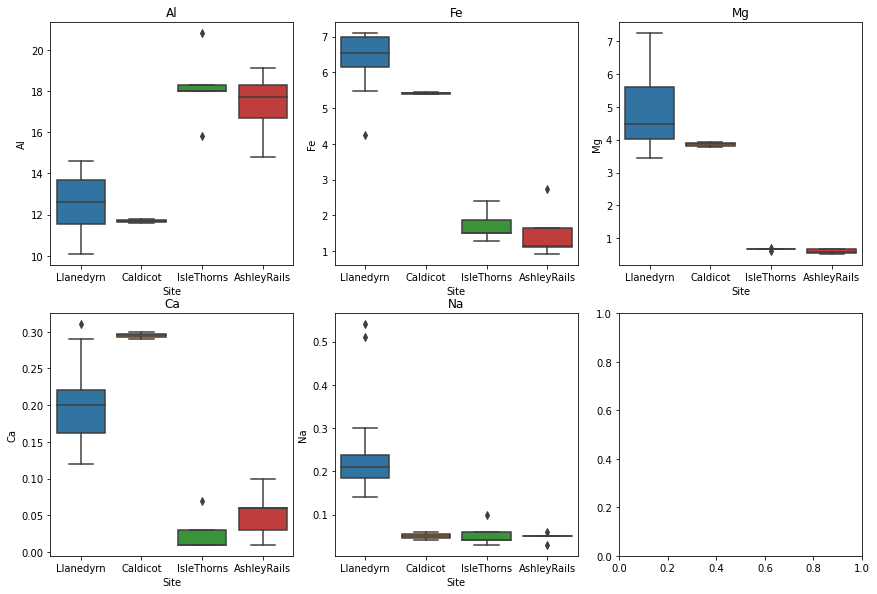

In [ ]:
f, axes = plt.subplots(2, 3)
f.tight_layout()
sns.boxplot(y="Al", x= "Site", data=df1,  orient='v', ax=axes[0,0]).set(title='Al')
sns.boxplot(y="Fe", x= "Site", data=df1,  orient='v', ax=axes[0,1]).set(title='Fe')
sns.boxplot(y="Mg", x= "Site", data=df1,  orient='v', ax=axes[0,2]).set(title='Mg')
sns.boxplot(y="Ca", x= "Site", data=df1,  orient='v', ax=axes[1,0]).set(title='Ca')
sns.boxplot(y="Na", x= "Site", data=df1,  orient='v', ax=axes[1,1]).set(title='Na')
plt.subplots_adjust(hspace = 0.2)
plt.show()